In [ ]:
#Using the older version of Keras because the 'keras.wrappers' module is not present in the later versions.
!pip install keras==2.12.0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('forestfires.csv')
pd.set_option('display.max_columns', None)  # To display all columns
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

### Outlier Detection

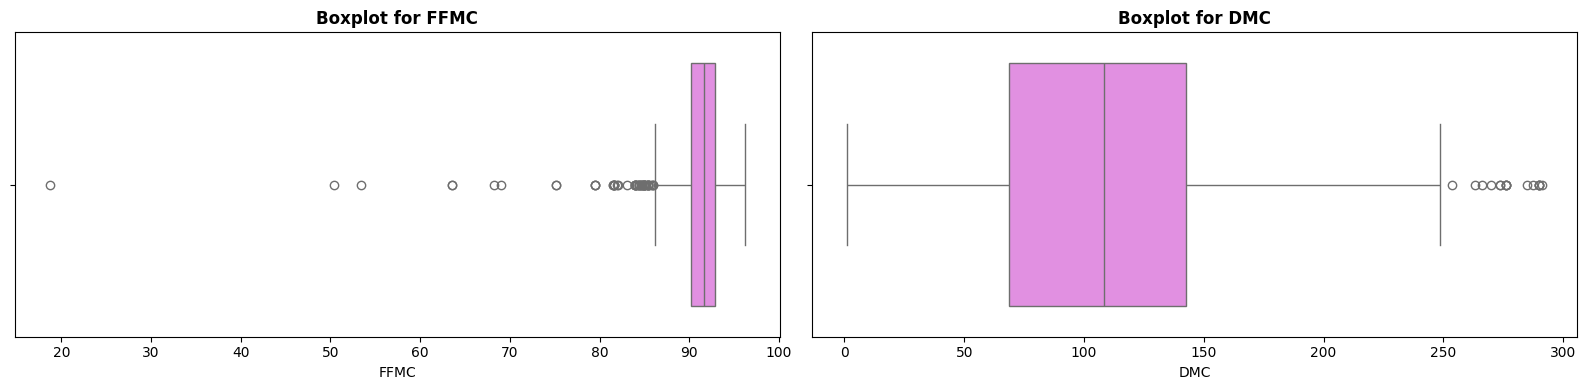

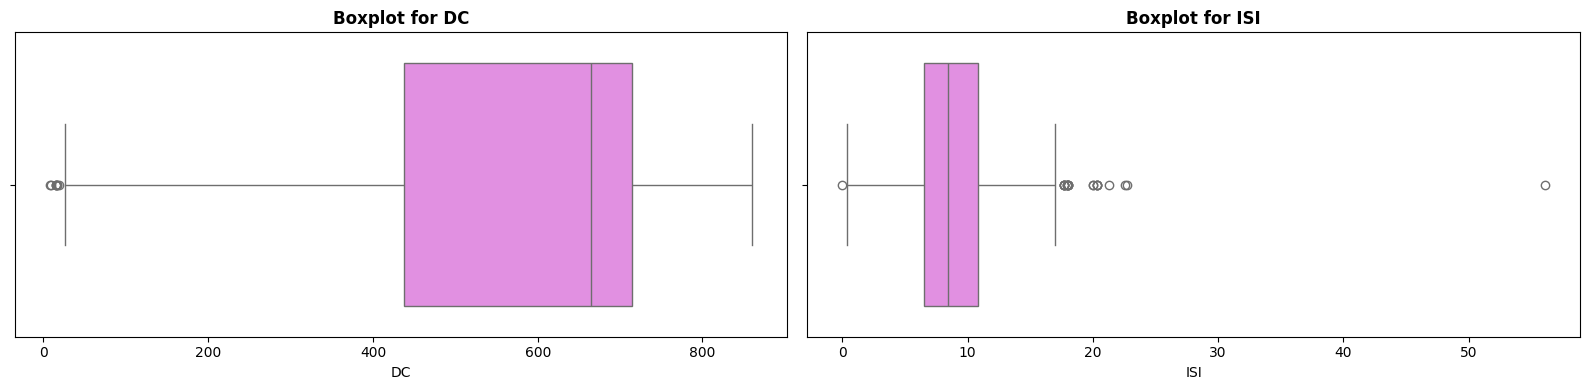

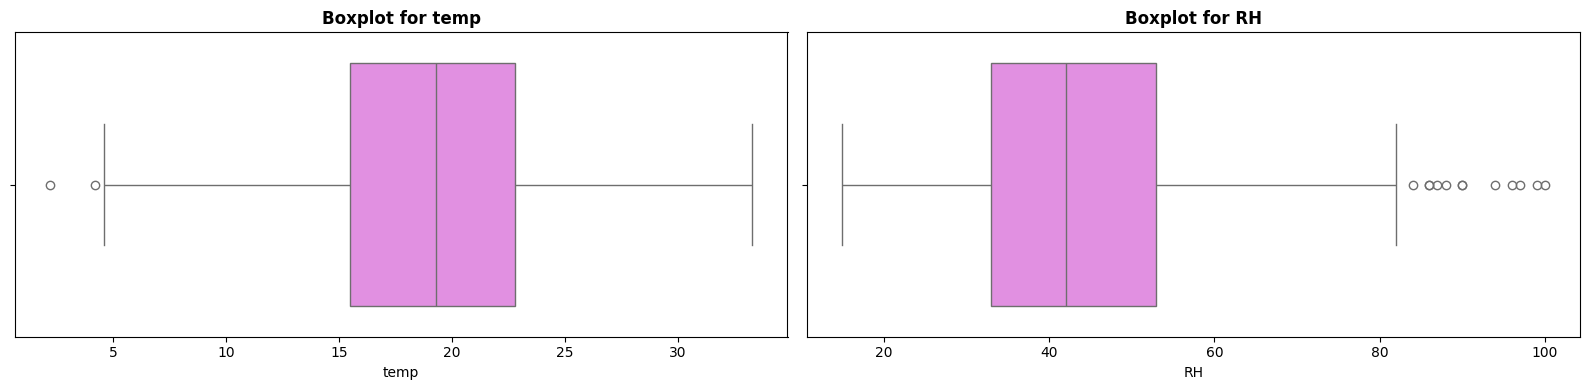

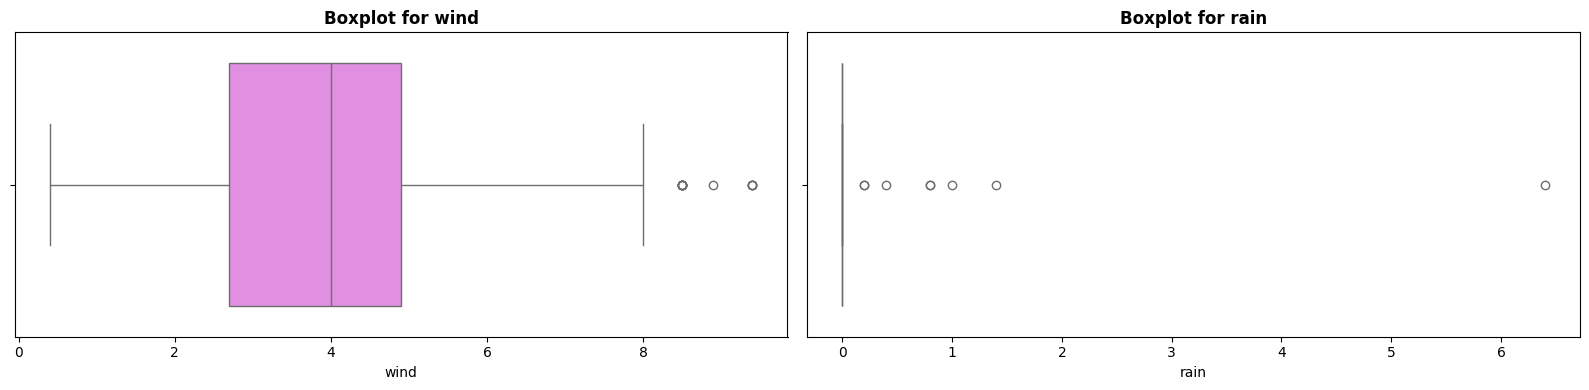

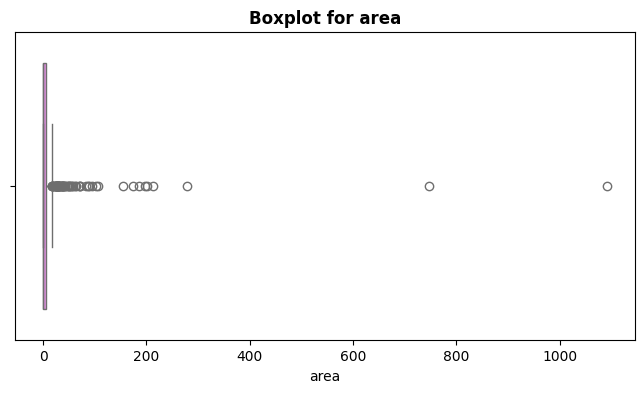

In [ ]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
box_color = "violet"

num_features = len(numerical_features)

rows = num_features // 2
remaining_cols = num_features % 2

for i in range(rows):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    # Get the starting and ending indices for the current row
    start_idx = i * 2
    end_idx = min(start_idx + 2, num_features)

    # Plot the boxplots on each subplot with specified color
    for j, column in enumerate(numerical_features[start_idx:end_idx]):
        sns.boxplot(x=df[column], ax=axes[j], color=box_color)  # Use box_color here
        axes[j].set_title(f'Boxplot for {column}', fontweight='bold')  # Apply bold font weight

    plt.tight_layout()
    plt.show()

# Handle remaining columns if any (only one in this case)
if remaining_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[numerical_features[-1]], color=box_color)
    plt.title(f'Boxplot for {numerical_features[-1]}', fontweight='bold')
    plt.show()

## Data Visualization

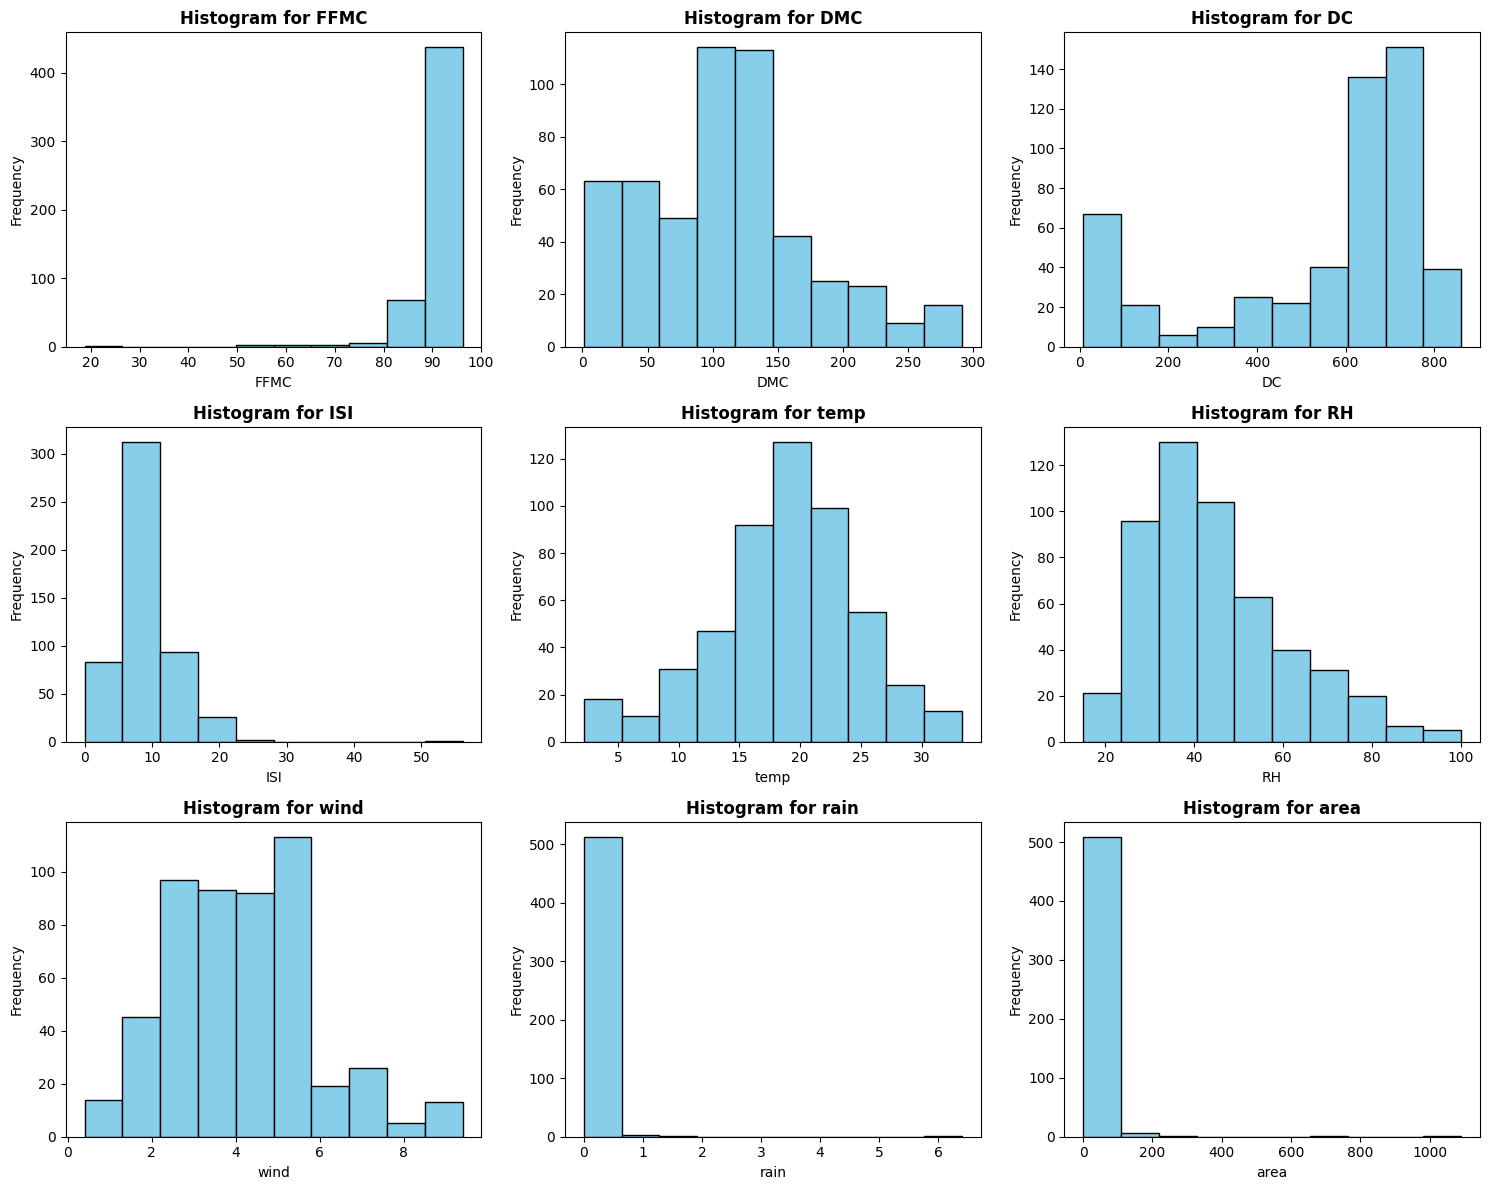

In [ ]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms for all numerical features
for i, feature in enumerate(numerical_features):
    plt.sca(axes[i])  # Set the current subplot
    plt.hist(df[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}', fontweight = 'bold')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


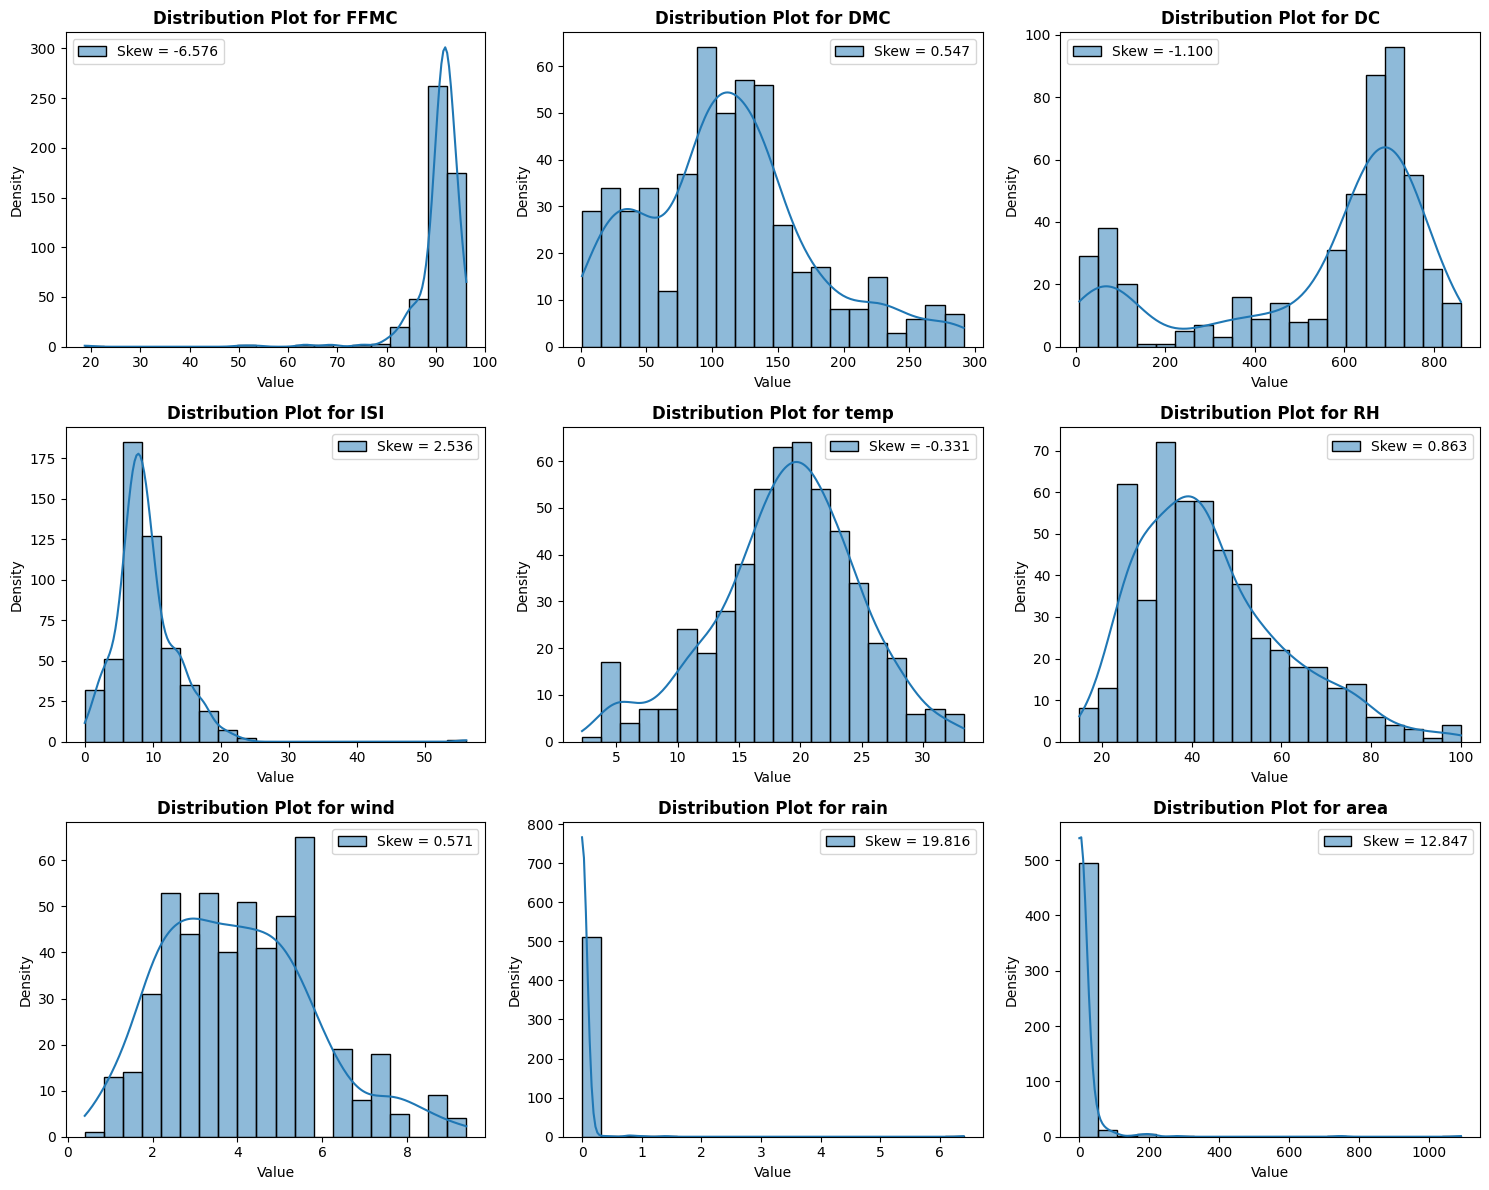

In [ ]:
numerical_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

# Distribution plot for all numerical features
for i, feature in enumerate(numerical_features):
    skewness = df[feature].skew()

    # Use displot from seaborn for each feature
    sns.histplot(df[feature], kde=True, label=f'Skew = {skewness:.3f}', bins=20, ax=axes[i])
    axes[i].legend(loc='best')
    axes[i].set_title(f'Distribution Plot for {feature}', fontweight = 'bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


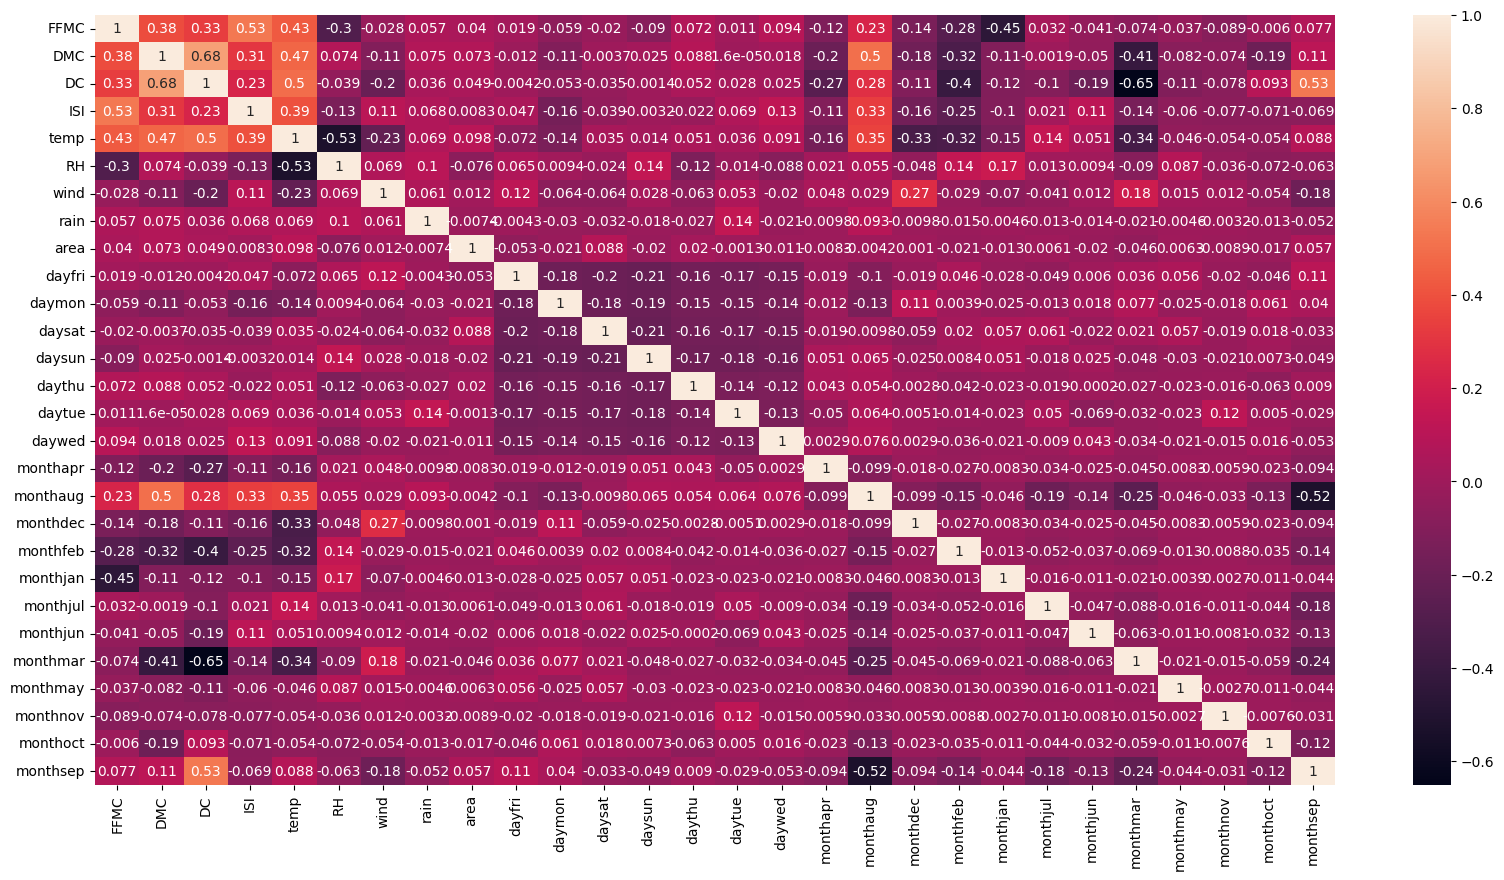

In [ ]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

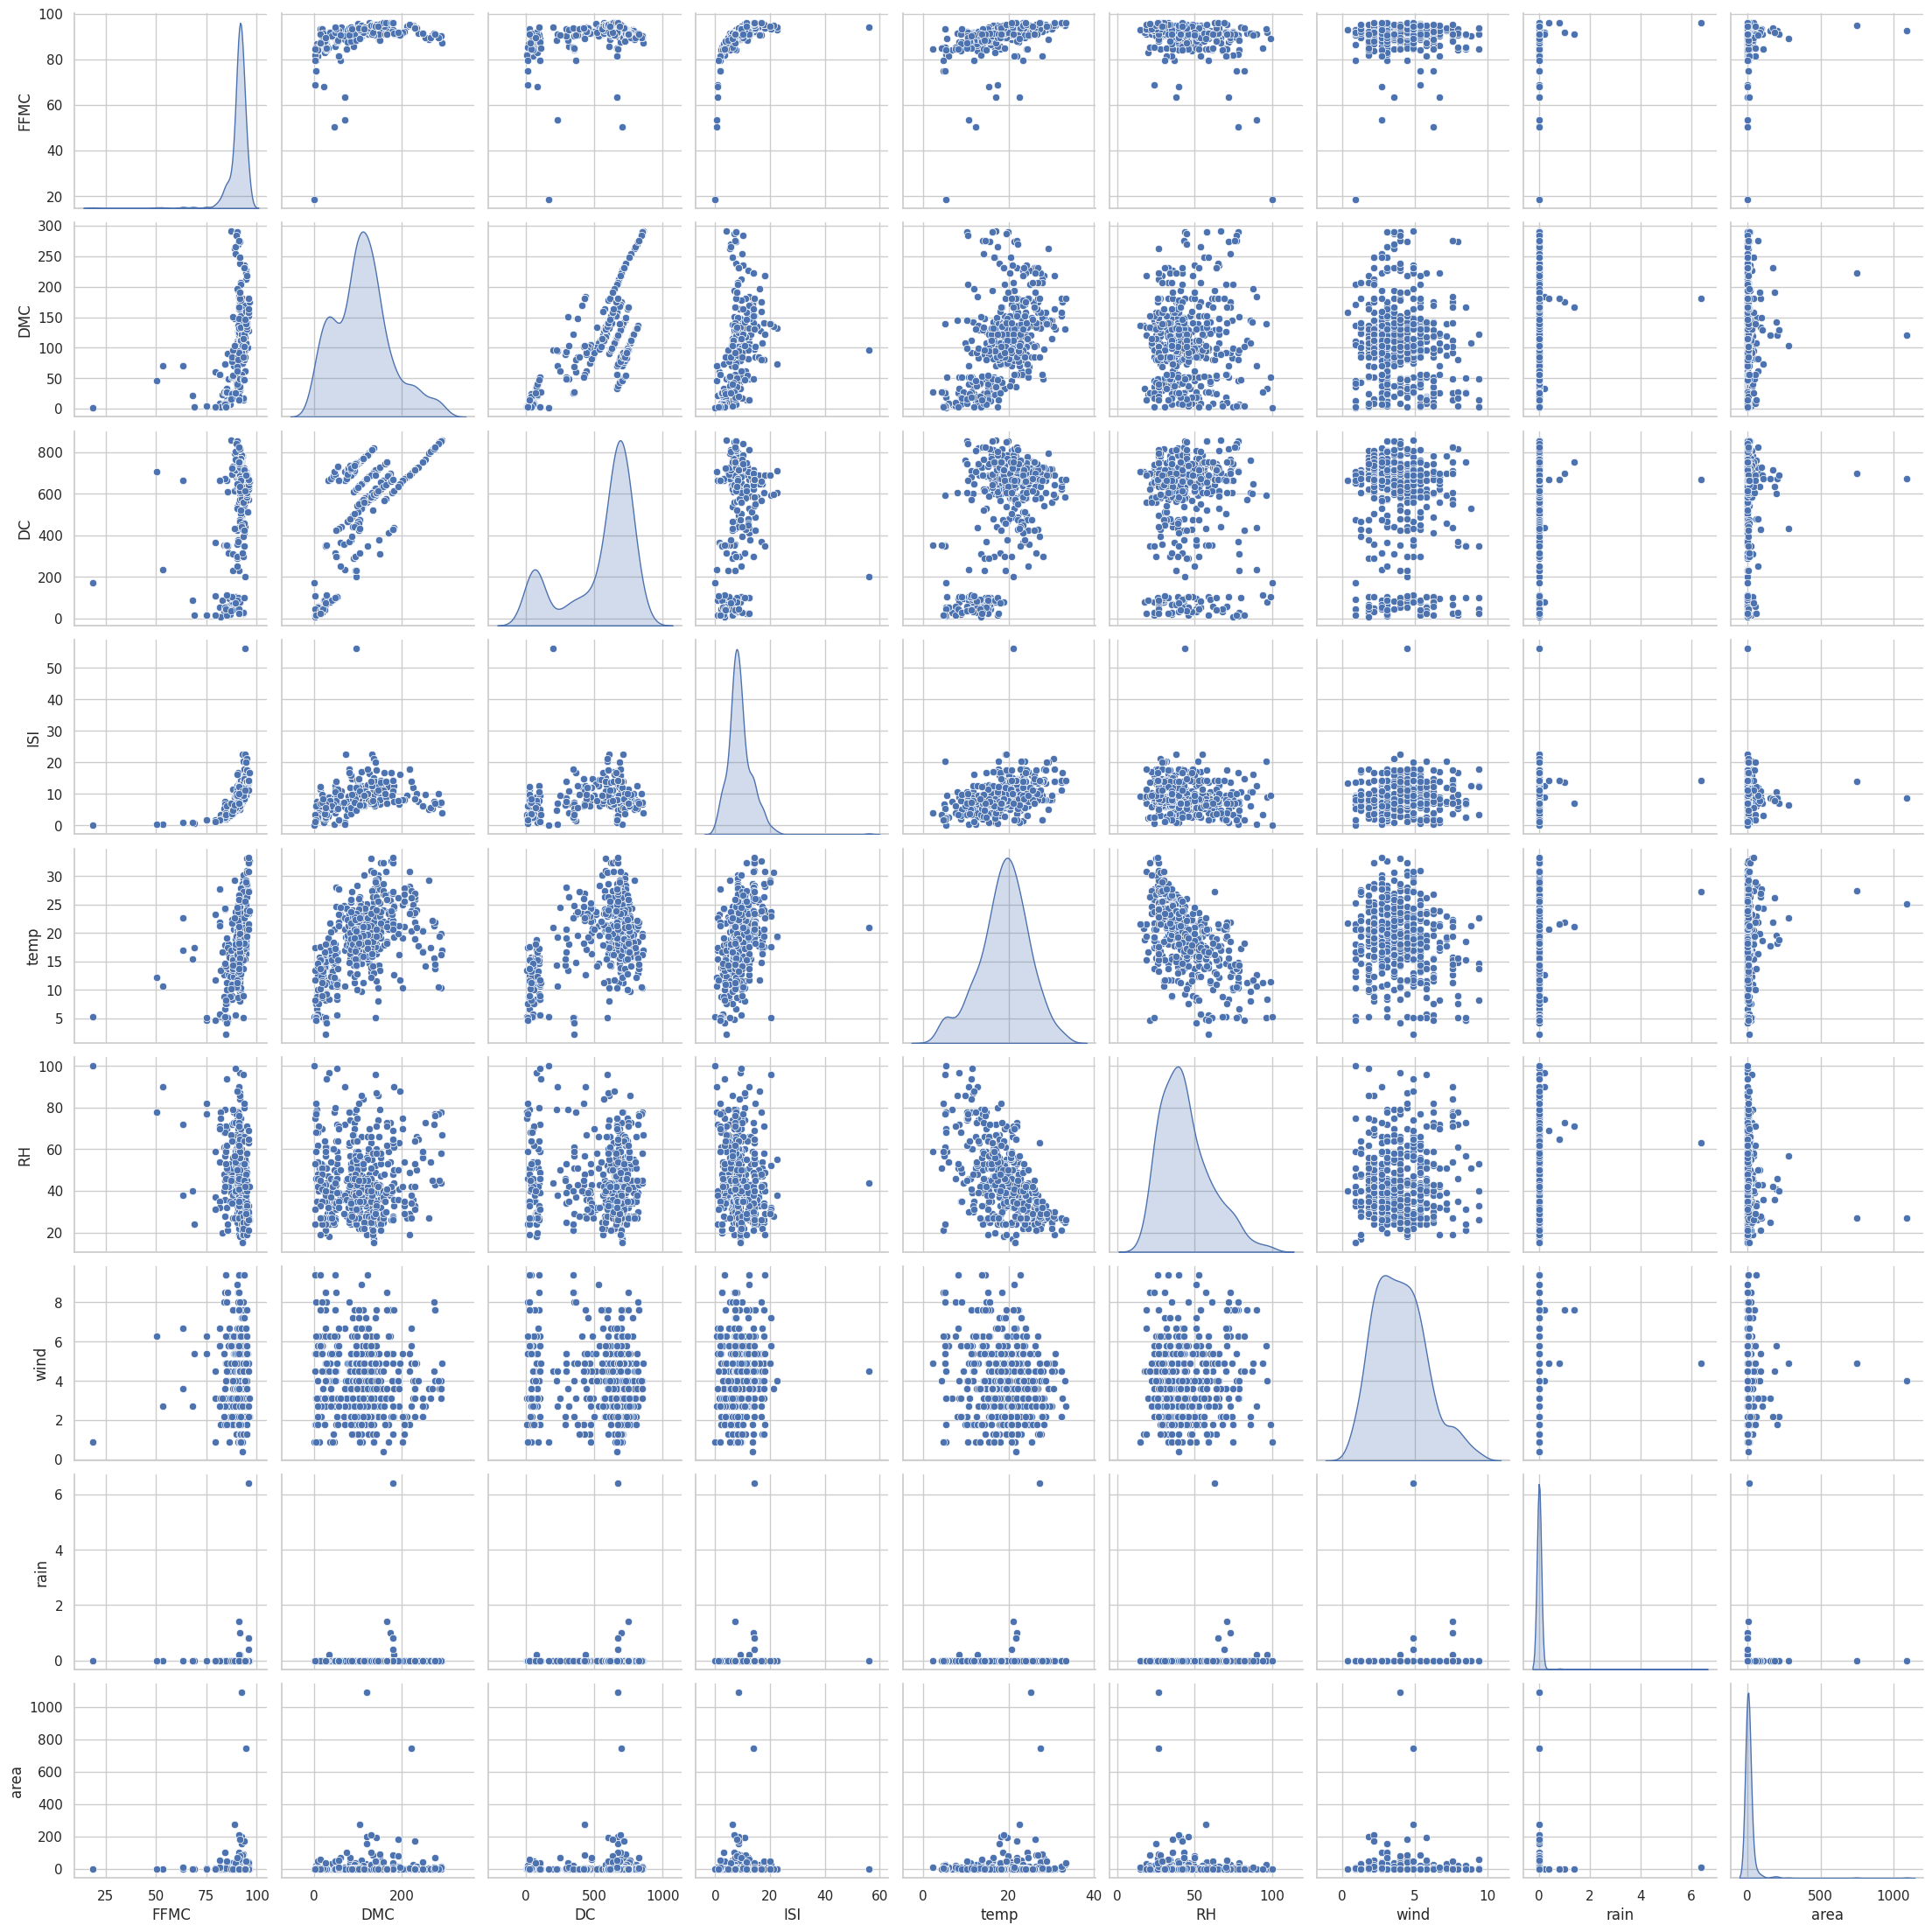

In [ ]:
# Pairplot
sns.set(style="whitegrid")
sns.pairplot(df[numerical_features], diag_kind="kde")
plt.show()

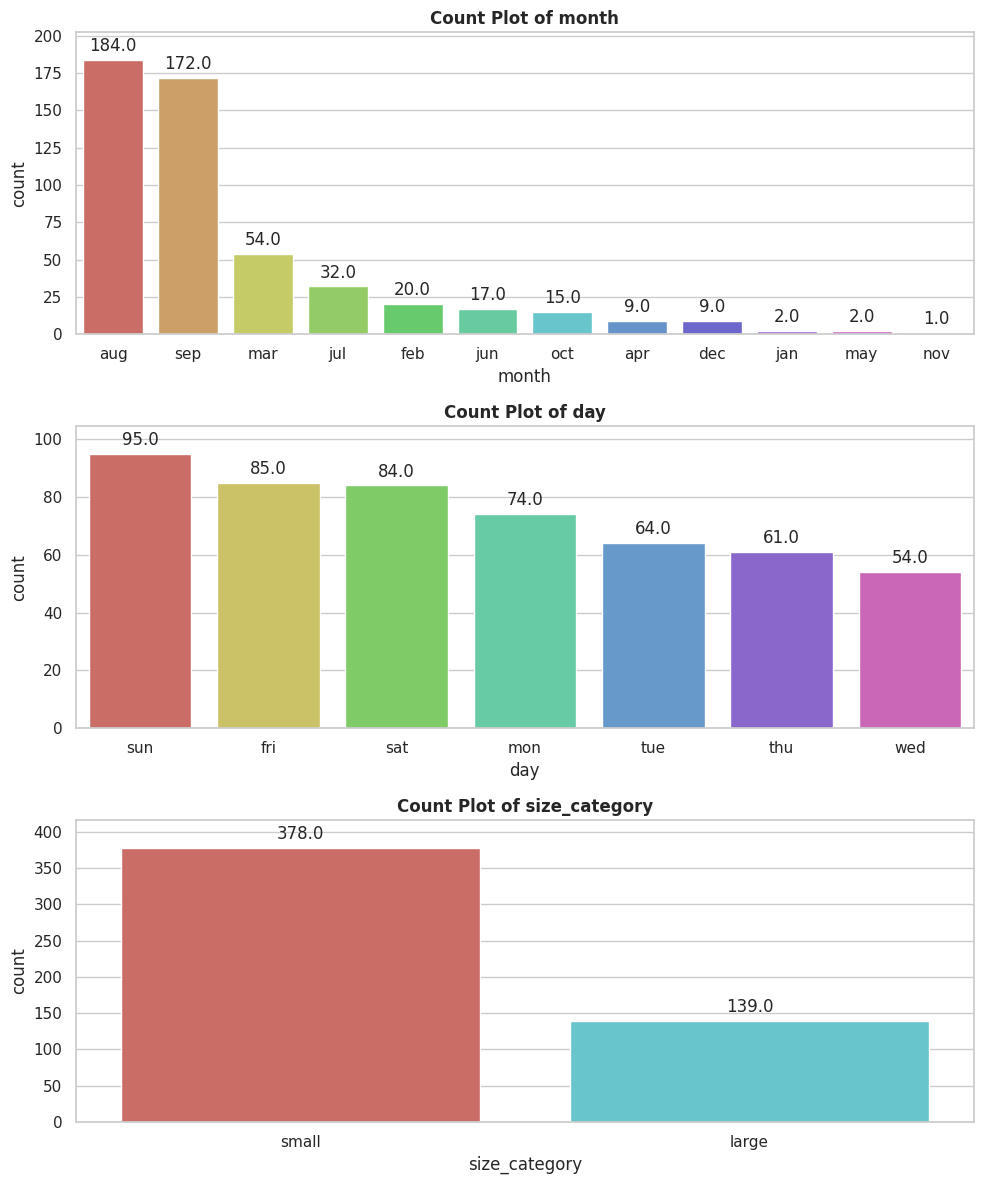

In [ ]:
# Set up subplots based on the number of columns
categorical_features = ['month', 'day', 'size_category']

fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, len(categorical_features) * 4))

# Iterate through each feature and create a count plot
for i, feature in enumerate(categorical_features):
    # Get the order of categories in ascending count
    order = df[feature].value_counts().index

    sns.countplot(x=feature, data=df, ax=axes[i], palette='hls', order=order)
    axes[i].set_title(f'Count Plot of {feature}', fontweight = 'bold')

    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axes[i].set_ylim(top=df[feature].value_counts().max() * 1.1)

plt.tight_layout()
plt.show()


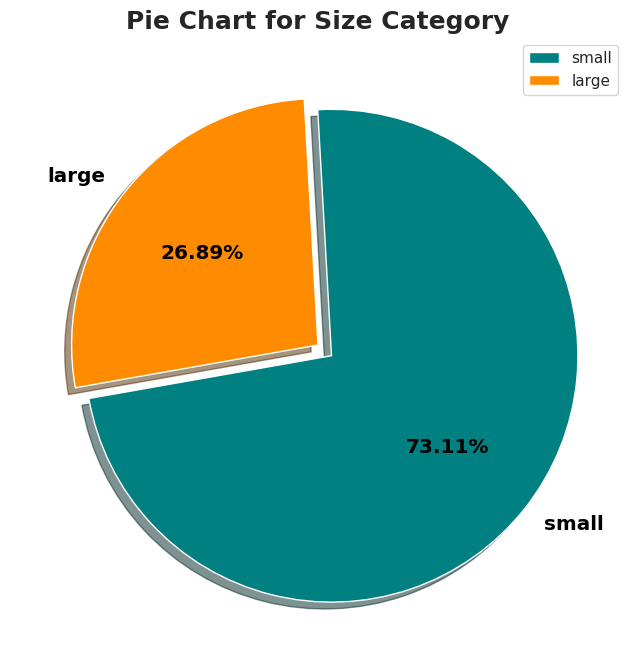

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(df['size_category'].value_counts(),
        labels=df['size_category'].unique(),
        explode=[0.07, 0.0],
        autopct='%.2f%%',
        colors=["#008080", "#ff8c00"],
        shadow=True,
        startangle=190,
        textprops={'size': 'large',
                   'fontweight': 'bold',
                   'color': 'black'})
plt.legend(loc='upper right')
plt.title("Pie Chart for Size Category", fontsize=18, fontweight='bold')
plt.show()

# Data Preprocessing

In [ ]:
# Label Encoding
LE = LabelEncoder()
df['size_category'] = LE.fit_transform(df['size_category'])

In [ ]:
# Standardization
columns_to_scale = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
SS = StandardScaler()
df[columns_to_scale] = SS.fit_transform(df[columns_to_scale])

## Splitting the data as **X**(Input) and **Y**(Output)

In [ ]:
X = df.drop(['month', 'day', 'size_category'], axis = 1)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df['size_category']
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train.columns)

28

### Tuning of Hyperparameters :- **Batch Size** and **Epochs**

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40,60]
epochs = [10,50,100,150]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(),
                    verbose = 10, error_score='raise')
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.795 total time=   1.8s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.795 total time=   1.8s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.711 total time=   2.6s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.780 total time=   1.7s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.768 total time=   1.6s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9589479923248291, using {'batch_size': 20, 'epochs': 150}
0.7699970602989197,0.031242767815933572 with: {'batch_size': 10, 'epochs': 10}
0.9419923543930053,0.030827603046892447 with: {'batch_size': 10, 'epochs': 50}
0.9540699362754822,0.03275217354549055 with: {'batch_size': 10, 'epochs': 100}
0.9516602993011475,0.031339411761956835 with: {'batch_size': 10, 'epochs': 150}
0.7313252925872803,0.031085940520192094 with: {'batch_size': 20, 'epochs': 10}
0.9007934212684632,0.023234769992706468 with: {'batch_size': 20, 'epochs': 50}
0.9516896843910218,0.03491976915591824 with: {'batch_size': 20, 'epochs': 100}
0.9589479923248291,0.03621350680748657 with: {'batch_size': 20, 'epochs': 150}
0.7313252925872803,0.031085940520192094 with: {'batch_size': 40, 'epochs': 10}
0.8354686975479126,0.03323984956930286 with: {'batch_size': 40, 'epochs': 50}
0.9250367283821106,0.021913707394364785 with: {'batch_size': 40, 'epochs': 100}
0.946841013431549,0.031081602203107617 with: {'batch_size': 40,

In [ ]:
batch_and_epochs = list(grid_result.best_params_.values())
batch_and_epochs

[20, 150]

In [ ]:
best_batch_size = batch_and_epochs[0]
best_epochs = batch_and_epochs[1]

In [ ]:
print('optimal Batch Size :',best_batch_size)
print('optimal epochs :', best_epochs)

optimal Batch Size : 20
optimal epochs : 150


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim = 28, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, input_dim = 8, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = best_batch_size,
                        epochs = best_epochs)

# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.952 total time=   5.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.892 total time=   6.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.964 total time=   6.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.988 total time=   5.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.951 total time=   5.1s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9565383553504944, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9492506623268128,0.03174154597720496 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.927534532546997,0.03564265620122422 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9274169921875,0.03313126922307583 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9516309142112732,0.02634361704774881 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9299147844314575,0.03352613480742684 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9467822551727295,0.03111853664044086 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9565383553504944,0.03539674578997751 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9395239472389221,0.027605579946726935 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8861004948616028,0.06798877473603133 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
LR_and_dropout = list(grid_result.best_params_.values())
LR_and_dropout

[0.2, 0.001]

In [ ]:
best_dropout = LR_and_dropout[0]
best_learning_rate = LR_and_dropout[1]

In [ ]:
print('optimal Learning Rate :',best_learning_rate)
print('optimal dropout :', best_dropout)

optimal Learning Rate : 0.001
optimal dropout : 0.2


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 28, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(best_dropout))
    model.add(Dense(8, input_dim = 28, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(best_dropout))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = best_learning_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = best_batch_size,
                        epochs = best_epochs)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.831 total time=   6.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.855 total time=   6.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.831 total time=   6.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.902 total time=   6.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.854 total time=   6.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9637672662734985, using {'activation_function': 'relu', 'init': 'normal'}
0.8548339605331421,0.025974146829424165 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8475462794303894,0.023120058408026226 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8184543132781983,0.01831037576623871 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9565383434295655,0.032844165613949164 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9637672662734985,0.03232917553267623 with: {'activation_function': 'relu', 'init': 'normal'}
0.7313252925872803,0.031085940520192094 with: {'activation_function': 'relu', 'init': 'zero'}
0.9613576292991638,0.03177912096391795 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9565383434295655,0.03620764047545434 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7313252925872803,0.031085940520192094 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9565383434295655,0.032844165613949164 with: {'act

In [ ]:
activation_and_init = list(grid_result.best_params_.values())
activation_and_init

['relu', 'normal']

In [ ]:
best_activation = str(activation_and_init[0])
best_init = str(activation_and_init[1])

In [ ]:
print('Best activation function :',best_activation)
print('Best Initialization :', best_init)

Best activation function : relu
Best Initialization : normal


#### Tuning of Hyperparameter :- Number of Neurons in activation layer

In [ ]:
# Defining the model
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 28, kernel_initializer = best_init, activation = best_activation))
    model.add(Dropout(best_dropout))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer = best_init, activation = best_activation))
    model.add(Dropout(best_dropout))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = best_learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = best_batch_size,
                        epochs = best_epochs)

# Define the grid search parameters
neuron1 = [8,16,32,64]
neuron2 = [8,16,32,64]

# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START neuron1=8, neuron2=8.......................................
[CV 1/5; 1/16] END ........neuron1=8, neuron2=8;, score=0.928 total time=   6.1s
[CV 2/5; 1/16] START neuron1=8, neuron2=8.......................................
[CV 2/5; 1/16] END ........neuron1=8, neuron2=8;, score=0.892 total time=   6.3s
[CV 3/5; 1/16] START neuron1=8, neuron2=8.......................................
[CV 3/5; 1/16] END ........neuron1=8, neuron2=8;, score=0.964 total time=   5.2s
[CV 4/5; 1/16] START neuron1=8, neuron2=8.......................................
[CV 4/5; 1/16] END ........neuron1=8, neuron2=8;, score=1.000 total time=   5.9s
[CV 5/5; 1/16] START neuron1=8, neuron2=8.......................................
[CV 5/5; 1/16] END ........neuron1=8, neuron2=8;, score=0.951 total time=   5.0s
[CV 1/5; 2/16] START neuron1=8, neuron2=16......................................
[CV 1/5; 2/16] END .......neuron1=8, neuron2=16;

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9589479923248291, using {'neuron1': 8, 'neuron2': 16}
0.9468704104423523,0.03620993226848016 with: {'neuron1': 8, 'neuron2': 8}
0.9589479923248291,0.03621350680748657 with: {'neuron1': 8, 'neuron2': 16}
0.9565089702606201,0.028046008212917972 with: {'neuron1': 8, 'neuron2': 32}
0.9589479804039002,0.03195466227156215 with: {'neuron1': 8, 'neuron2': 64}
0.9540993213653565,0.03350791943218537 with: {'neuron1': 16, 'neuron2': 8}
0.9565383434295655,0.031025992456566176 with: {'neuron1': 16, 'neuron2': 16}
0.9565383434295655,0.031025987827364813 with: {'neuron1': 16, 'neuron2': 32}
0.9516896843910218,0.03407824909928503 with: {'neuron1': 16, 'neuron2': 64}
0.9419923663139343,0.038378554551351036 with: {'neuron1': 32, 'neuron2': 8}
0.9419923663139343,0.03603779875365029 with: {'neuron1': 32, 'neuron2': 16}
0.9371730804443359,0.03263079609665556 with: {'neuron1': 32, 'neuron2': 32}
0.946841025352478,0.029055807890792543 with: {'neuron1': 32, 'neuron2': 64}
0.9419923543930053,0.0245348

In [ ]:
neurons = list(grid_result.best_params_.values())
neurons

[8, 16]

In [ ]:
neuron_1 = neurons[0]
neuron_2 = neurons[1]

In [ ]:
print('neuron1 :',neuron_1)
print('neuron2 :', neuron_2)

neuron1 : 8
neuron2 : 16


### Optimal Parameters

In [ ]:
optimal_dict = {'Parameters' : ['best_batch_size', 'best_epochs', 'best_learning_rate', 'best_dropout', 'best_activation', 'best_init', 'neuron_1', 'neuron_2'],
                'Opt.Values' : [best_batch_size, best_epochs, best_learning_rate, best_dropout, best_activation, best_init, neuron_1, neuron_2]}

optimal_parameters = pd.DataFrame(optimal_dict)
optimal_parameters

,Parameters,Opt.Values
0,best_batch_size,20
1,best_epochs,150
2,best_learning_rate,0.001
3,best_dropout,0.2
4,best_activation,relu
5,best_init,normal
6,neuron_1,8
7,neuron_2,16


### Building model with optimum values of Hyperparameters

In [ ]:
 # create ANN model
final_model = Sequential()

# Defining the first layer of the model
final_model.add(Dense(neuron_1 ,input_dim = 28, kernel_initializer = best_init, activation = best_activation))
final_model.add(Dropout(best_dropout))

# Defining the Second layer of the model
final_model.add(Dense(neuron_2, kernel_initializer = best_init, activation = best_activation))
final_model.add(Dropout(best_dropout))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
final_model.add(Dense(1,activation = 'sigmoid'))

adam = Adam(lr = best_learning_rate)
final_model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
history = final_model.fit(X_train, Y_train, validation_split=0.2, batch_size = best_batch_size, epochs = best_epochs)

Epoch 1/150
17/17 [==============================] - 1s 22ms/step - loss: 0.6821 - accuracy: 0.7242 - val_loss: 0.6682 - val_accuracy: 0.7711
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.7212 - val_loss: 0.6449 - val_accuracy: 0.7711
Epoch 3/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6446 - accuracy: 0.7212 - val_loss: 0.6199 - val_accuracy: 0.7711
Epoch 4/150
17/17 [==============================] - 0s 8ms/step - loss: 0.6260 - accuracy: 0.7212 - val_loss: 0.5966 - val_accuracy: 0.7711
Epoch 5/150
17/17 [==============================] - 0s 8ms/step - loss: 0.6067 - accuracy: 0.7212 - val_loss: 0.5730 - val_accuracy: 0.7711
Epoch 6/150
17/17 [==============================] - 0s 6ms/step - loss: 0.5912 - accuracy: 0.7212 - val_loss: 0.5551 - val_accuracy: 0.7711
Epoch 7/150
17/17 [==============================] - 0s 6ms/step - loss: 0.5842 - accuracy: 0.7212 - val_loss: 0.5431 - val_accuracy: 0.7711
Epoch 8/150


In [ ]:
# evaluate the model
scores = final_model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (final_model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 5ms/step - loss: 0.2700 - accuracy: 0.9615
accuracy: 96.15%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

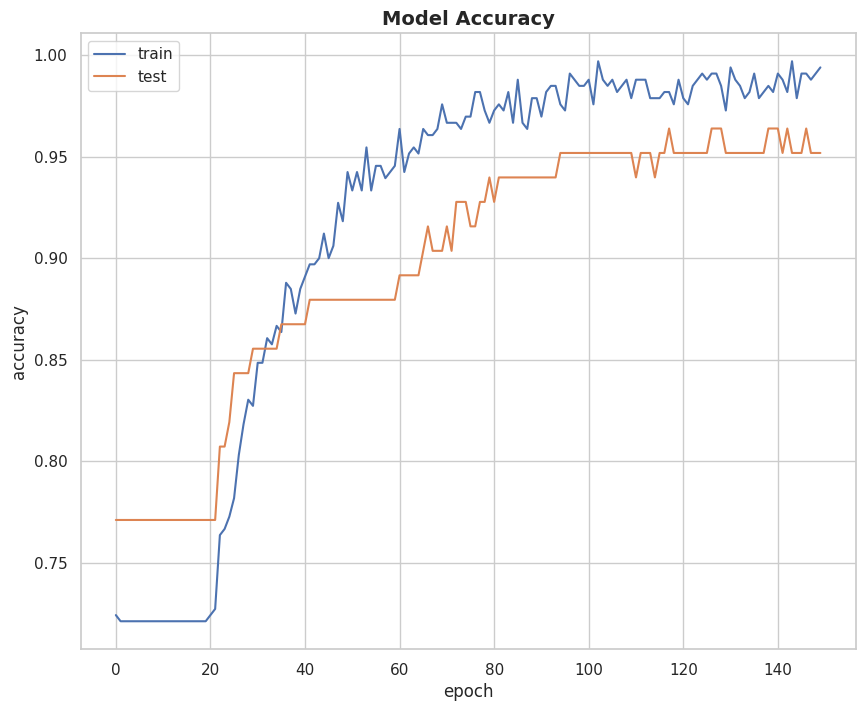

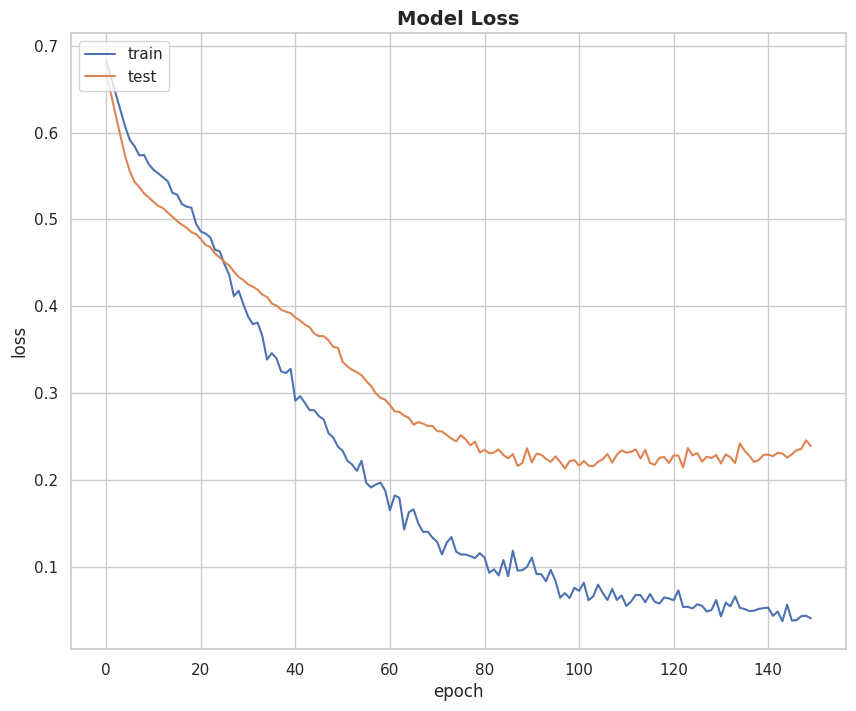

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy',fontsize = 14, fontweight = 'bold')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 14, fontweight = 'bold')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Model Predictions

In [ ]:
#Train Predictions
Y_train_pred = final_model.predict(X_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = Y_train
train_prediction['Train_Probability'] = Y_train_pred
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

13/13 [==============================] - 0s 2ms/step
(413, 3)


,Train_Actual,Train_Probability,Train_Predicted
329,1,0.988647,1
173,1,0.992748,1
272,1,0.996000,1
497,0,0.028268,0
182,0,0.072797,0
268,1,0.999910,1
352,1,0.999684,1
117,1,0.999767,1
393,1,0.999885,1
332,0,0.028544,0


In [ ]:
# Test Predictions
Y_test_pred = final_model.predict(X_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = Y_test
test_prediction['Test_Probability'] = Y_test_pred

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

4/4 [==============================] - 0s 3ms/step
(104, 3)


,Test_Actual,Test_Probability,Test_Predicted
304,1,0.999904,1
501,1,0.999614,1
441,1,0.999641,1
153,1,0.999732,1
503,1,0.996892,1
131,1,0.999842,1
204,0,0.033157,0
512,0,0.996261,1
325,1,0.999894,1
247,1,0.999880,1


# Classification Report

In [ ]:
# Train and Test Accuracies
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy score for Train Data =', np.round(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted']),2)*100,"%")
print("Accuracy score for Test Data = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")

Accuracy score for Train Data = 99.0 %
Accuracy score for Test Data =  96.0 %


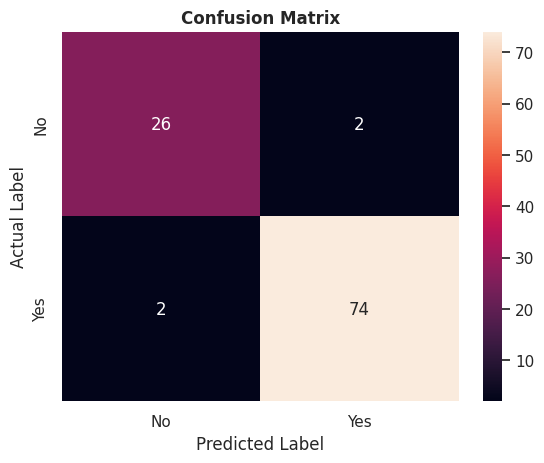

In [ ]:
# confusion matrix
cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix", fontweight = 'bold')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.97      0.97      0.97        76

    accuracy                           0.96       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.96      0.96      0.96       104

